Link to : https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac

### Objective

Demonstrates the concept of segmentation of a customer dataset.
Using k-means clustering to derice the optimum number of clusters

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
import seaborn as sns
sns.set()
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [7]:
# Read csv file
dataset = pd.read_csv('./data.csv')

dataset

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [9]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pcminh/dsktlab-intake/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Income/Spend')

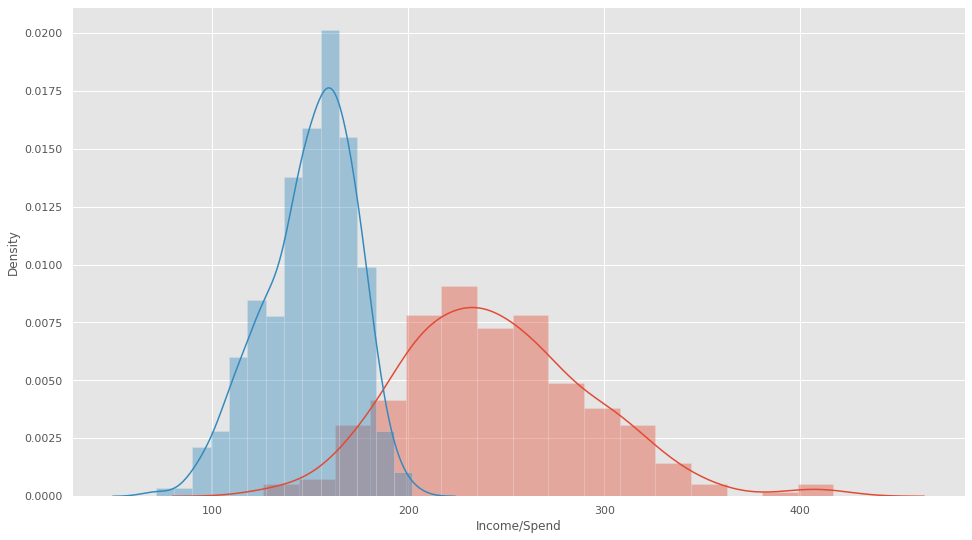

In [10]:
# distplot
pl_income = sns.distplot(dataset['INCOME'])
pl_spend = sns.distplot(dataset['SPEND'])
plt.xlabel('Income/Spend')

[(0.0, 420.0)]

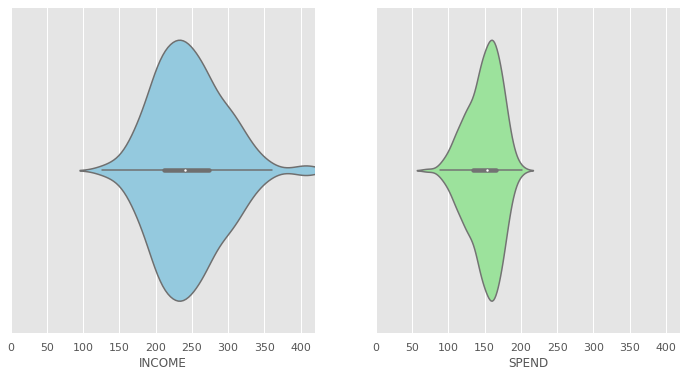

In [11]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

### Clustering fundamentals

Clustering is:

  - an unsupervised ML technique
  - no defined dependent and independent vars
  - patterns in data used to id similar observations

### K-means clustering

an iterative clustering algorithm where the number of clusters K is predetermined
and alg iteratively assigns each data point to 1 of the K clusters based on feature similarity

### Elbow method

Ref: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster



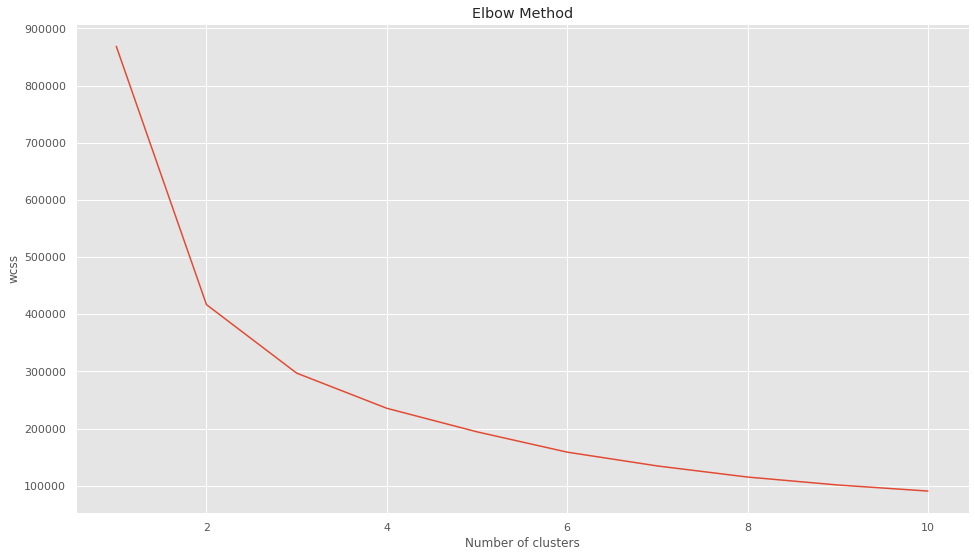

In [13]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(dataset)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(dataset)

In [21]:
y_means

array([3, 3, 2, 3, 1, 2, 1, 3, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 3, 3, 3, 3,
       3, 0, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3, 2, 0,
       1, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 1, 0, 1, 2, 2, 2, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 3, 2,
       2, 0, 3, 2, 3, 1, 2, 0, 1, 3, 1, 3, 3, 0, 2, 3, 2, 2, 0, 3, 3, 3,
       1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 3, 2, 0, 2, 3,
       1, 3, 1, 3, 2, 2, 2, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 2, 0, 0, 3, 3, 2, 3, 3, 1, 3, 2, 2,
       3, 1, 2, 0, 1, 0, 1, 3, 0, 1, 3, 0, 3, 2, 1, 2, 2, 0, 2, 1, 3, 3,
       0, 3, 2, 0, 0, 3, 2, 3, 3, 3, 2, 2, 3, 0, 2, 1, 3, 1, 0, 1, 0, 3,
       1, 0, 3, 0, 0, 2, 0, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 3,
       2, 0, 2, 3, 1, 0, 3, 3, 1, 3, 0, 1, 0, 1, 0, 2, 3, 3, 3, 3, 0, 3,
       2, 2, 1, 2, 0, 0, 3, 3, 0, 3, 0, 2, 0, 0, 1, 2, 1, 2, 2, 3, 2, 1,
       2, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0, 0, 2,

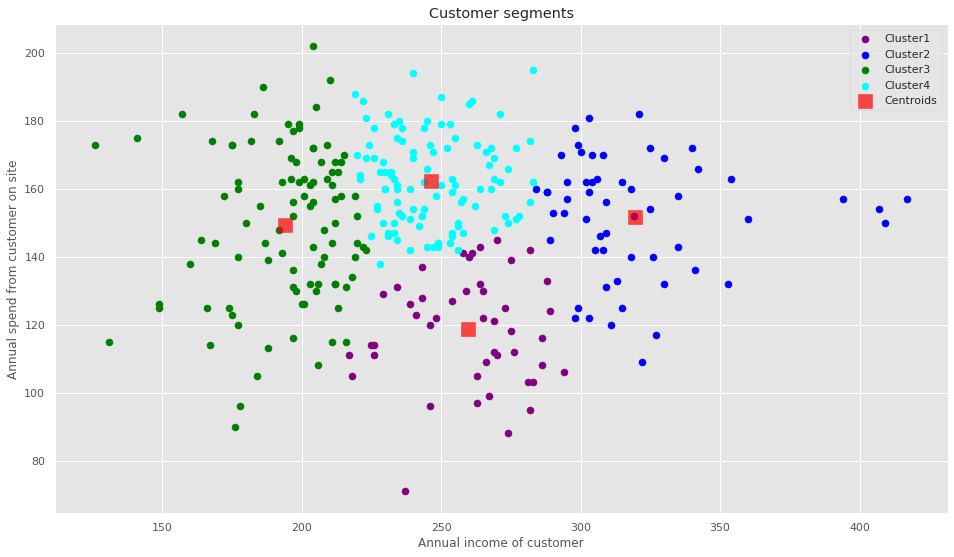

In [42]:
#Visualizing the clusters for k=4

# https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key
plt.scatter(dataset.iloc[y_means==0,0],dataset.iloc[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(dataset.iloc[y_means==1,0],dataset.iloc[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(dataset.iloc[y_means==2,0],dataset.iloc[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(dataset.iloc[y_means==3,0],dataset.iloc[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

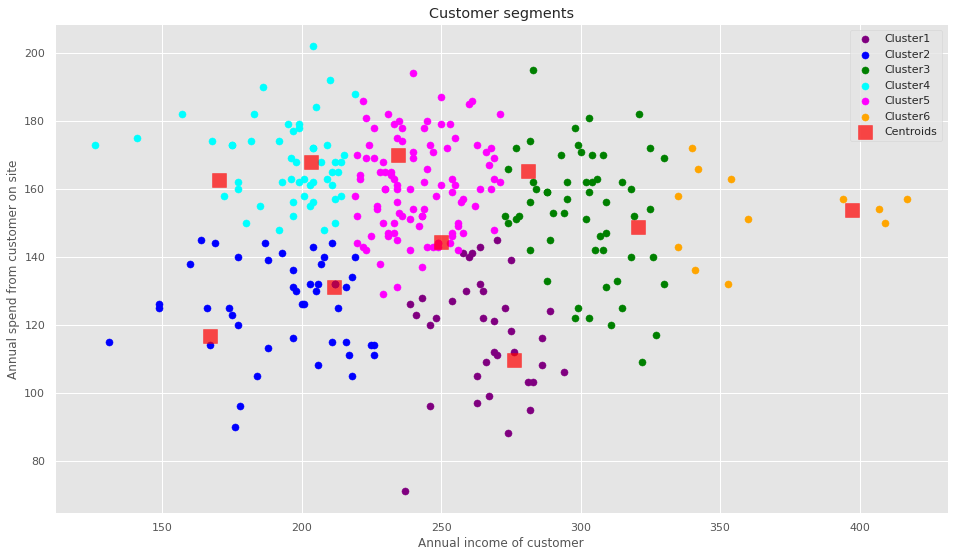

In [43]:
##Fitting kmeans to the dataset - k=6
km4=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(dataset)
#Visualizing the clusters
plt.scatter(dataset.iloc[y_means==0,0],dataset.iloc[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(dataset.iloc[y_means==1,0],dataset.iloc[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(dataset.iloc[y_means==2,0],dataset.iloc[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(dataset.iloc[y_means==3,0],dataset.iloc[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(dataset.iloc[y_means==4,0],dataset.iloc[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(dataset.iloc[y_means==5,0],dataset.iloc[y_means==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()